# FSIP2 proteomics cis comparison

"This gene encodes a protein associated with the sperm fibrous sheath. The protein encoded by this gene is specific to spermatogenic cells." https://ghr.nlm.nih.gov/gene/FSIP2

## Step 1: Library Imports

Run this cell to import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import sys 
sys.path.append('C:\\Users\\brittany henderson\\GitHub\\WhenMutationsMatter\\Brittany\\')
import functions as f

import cptac
import cptac.algorithms as al

## Step 2: Find the frequently mutated genes for Endometrial Cancer

Enter the type of cancer and the cutoff for mutation frequency that you would like to use.

In [2]:
en_object = cptac.Endometrial()
desired_cutoff = .1

endometrial_freq_mut = al.get_frequently_mutated(en_object, cutoff = desired_cutoff)
print('\n\nNumber of Frequently Mutated Genes:', len(endometrial_freq_mut), '\n', endometrial_freq_mut.head())

                                    

Number of Frequently Mutated Genes: 232 
         Unique_Samples_Mut  Missence_Mut  Truncation_Mut
Gene                                                    
ABCA12            0.147368      0.094737        0.073684
ABCA13            0.115789      0.105263        0.042105
ACVR2A            0.105263      0.010526        0.094737
ADGRG4            0.136842      0.126316        0.021053
ADGRV1            0.115789      0.094737        0.052632


## Step 3: Select ARID1A, a frequently mutated gene

In [3]:
gene = 'FSIP2'

## Step 4: Select proteomics

In [4]:
omics = en_object.get_proteomics()

## Step 5: cis comparison 

Determine if the DNA mutation has an effect on the omics measurement. In order to do this, we have a few steps in code. These steps are found in the format_cis_comparison_data function.
1. get a table with both the omics and mutation data for tumors
2. get a binary column from the mutation data to separate our samples
3. format data frame to be used in the T-test
4. send data to the T-test.

The format_cis_comparison_data does the first 3 steps.

In [5]:
omics_and_mutations = en_object.join_omics_to_mutations(
        mutations_genes = gene, omics_df_name = 'proteomics', omics_genes = gene)
omics_and_mutations.head()

FSIP2 did not match any columns in proteomics dataframe. FSIP2_proteomics column inserted, but filled with NaN.


,FSIP2_proteomics,FSIP2_Mutation,FSIP2_Location,FSIP2_Mutation_Status,Sample_Status
Sample_ID,,,,,
S001,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
S002,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
S003,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
S005,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
S006,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor


No proteomics data for FSIP2 in the endometrial dataset. Not possible to do cis comparison.

# Repeat with the Colon dataset

Go through the same process, this time using the Colon dataset. We will only print five genes from the frequently mutated data frame for simplicity.

In [6]:
colon_object = cptac.Colon()
desired_cutoff = .1

colon_freq_mut = al.get_frequently_mutated(colon_object, cutoff = desired_cutoff)
print('\n\nNumber of Frequently Mutated Genes:', len(colon_freq_mut), '\n', colon_freq_mut.head())

                                    

Number of Frequently Mutated Genes: 612 
         Unique_Samples_Mut  Missence_Mut  Truncation_Mut
Gene                                                    
ABCA13            0.195876      0.164948        0.103093
ABCA2             0.175258      0.164948        0.030928
ABCA4             0.144330      0.082474        0.061856
ABCB4             0.134021      0.061856        0.072165
ABCB6             0.103093      0.061856        0.041237


In [7]:
omics_and_mutations = colon_object.join_omics_to_mutations(
        mutations_genes = gene, omics_df_name = 'proteomics', omics_genes = gene)
omics_and_mutations.head()

FSIP2 did not match any columns in proteomics dataframe. FSIP2_proteomics column inserted, but filled with NaN.


,FSIP2_proteomics,FSIP2_Mutation,FSIP2_Location,FSIP2_Mutation_Status,Sample_Status
Sample_ID,,,,,
S002,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
S003,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
S004,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
S005,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
S006,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor


No proteomics data for FSIP2 in the colon dataset. Not possible to do cis comparison.

# Repeat with the Ovarian dataset


In [8]:
ovarian_object = cptac.Ovarian()
desired_cutoff = .1

ovarian_freq_mut = al.get_frequently_mutated(ovarian_object, cutoff = desired_cutoff)

<bound method NDFrame.keys of        Unique_Samples_Mut  Missence_Mut  Truncation_Mut
Gene                                                   
BAP1             0.154545      0.063636        0.090909
KDM5C            0.172727      0.036364        0.145455
MUC16            0.118182      0.072727        0.000000
PBRM1            0.400000      0.072727        0.336364
SETD2            0.145455      0.018182        0.118182
TTN              0.209091      0.090909        0.036364
VHL              0.745455      0.300000        0.445455>

In [9]:
ov_omics = ovarian_object.get_proteomics()
gene = 'FSIP2'

omics_col_list = ['FSIP2_proteomics']
prot_col = gene+'_proteomics'

Doing t-test comparison for mutation status

No significant comparisons.
None


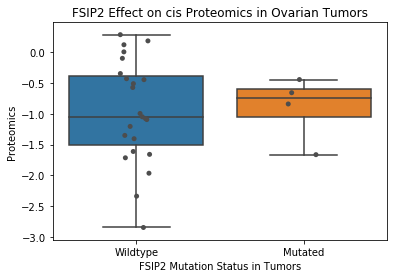

In [10]:
ov_status = f.format_cis_comparison_data(ovarian_object, ov_omics, 'proteomics', gene)
#print(ov_status.head())
print("Doing t-test comparison for mutation status\n")
significant_pval_results = al.wrap_ttest(ov_status, 'binary_mutations', omics_col_list)
print(significant_pval_results)

ov_cis_boxplot = sns.boxplot(data = ov_status, x = 'binary_mutations',
                          y = prot_col, order = ["Wildtype","Mutated"], showfliers = False)  
ov_cis_boxplot.set_title(gene + " Effect on cis Proteomics in Ovarian Tumors")
ov_cis_boxplot = sns.stripplot(data = ov_status, x = 'binary_mutations',y = prot_col, jitter = True, 
                        color = ".3", order = ["Wildtype","Mutated"])
ov_cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Proteomics")
plt.show()


Doing t-test comparison for mutation type

No significant comparisons.
None


C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[Text(0, 0.5, 'Proteomics'), Text(0.5, 0, 'FSIP2 Mutation Type')]

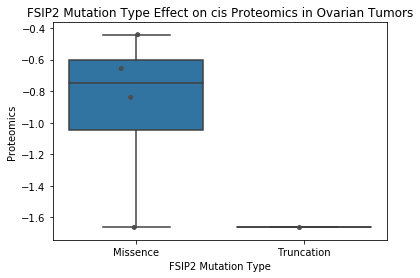

In [11]:
ov_type = f.get_missence_truncation_comparison(ovarian_object, ov_omics, 'proteomics', gene)

print("Doing t-test comparison for mutation type\n")
significant_pval_results = al.wrap_ttest(ov_type, 'binary_mutations', omics_col_list)
print(significant_pval_results)

ov_cis_boxplot = sns.boxplot(data = ov_type, x = 'binary_mutations',
                          y = prot_col, order = ["Missence","Truncation"], showfliers = False)  
ov_cis_boxplot.set_title(gene + " Mutation Type Effect on cis Proteomics in Ovarian Tumors")
ov_cis_boxplot = sns.stripplot(data= ov_type, x = 'binary_mutations',
                            y = prot_col,jitter = True, color = ".3", order = ["Missence","Truncation"])
ov_cis_boxplot.set(xlabel = gene + " Mutation Type", ylabel = 'Proteomics')

# Repeat with Kidney dataset

In [12]:
rc_object = cptac.RenalCcrcc()
desired_cutoff = .1

ovarian_freq_mut = al.get_frequently_mutated(rc_object, cutoff = desired_cutoff)

In [13]:
omics_and_mutations = rc_object.join_omics_to_mutations(
        mutations_genes = gene, omics_df_name = 'proteomics', omics_genes = gene)
omics_and_mutations.head()

FSIP2 did not match any columns in proteomics dataframe. FSIP2_proteomics column inserted, but filled with NaN.


,FSIP2_proteomics,FSIP2_Mutation,FSIP2_Location,FSIP2_Mutation_Status,Sample_Status
Sample_ID,,,,,
S001,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
S002,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
S003,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
S004,NaN,[Missense_Mutation],[p.K2329I],Single_mutation,Tumor
S005,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor


No proteomics data for FSIP2 in the kidney dataset. Not possible to do cis comparison.

# Analysis of Results

Only the ovarian dataset had proteomics data for FSIP2 and the cis comparison was not significant.